# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Rifqi Fadhlurrohman
- **Email:** rifqifadhlu088@gmail.com
- **ID Dicoding:** MC006D5Y1237

## Menentukan Pertanyaan Bisnis

- Bagaimana penggunaan rental sepeda setiap bulan pada tahun 2011-2012?
- Bagaimana pengaruh kondisi kecepatan angin terhadap penggunaan sepeda setiap bulan pada tahun 2011-2012?
- Bagaimana pengaruh suhu terhadap penggunaan rental sepeda setiap bulan pada tahun 2011-2012?
- Bagaimana pengaruh Musim terhadap penggunaan rental sepeda setiap bulan pada tahun 2011-2012?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import os

## Data Wrangling

### Data Gathering

In [4]:
day_df = pd.read_csv("D:/DICODING/submission/Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Data Assesing

In [5]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Insight:
- Berdasarkan output ini diketahui bahwa dataset tidak memiliki kolom yang kosong sehingga dapat dilanjutkan untuk proses berikutnya

In [6]:
day_df.duplicated().sum()

0

Insight:
- Berdasarkan kode ini diketahui bahwa dataset tidak memiliki data yang duplikat sehingga dapat dilanjutkan untuk proses berikutnya

             temp       atemp         hum   windspeed
count  731.000000  731.000000  731.000000  731.000000
mean     0.495385    0.474354    0.627894    0.190486
std      0.183051    0.162961    0.142429    0.077498
min      0.059130    0.079070    0.000000    0.022392
25%      0.337083    0.337842    0.520000    0.134950
50%      0.498333    0.486733    0.626667    0.180975
75%      0.655417    0.608602    0.730209    0.233214
max      0.861667    0.840896    0.972500    0.507463


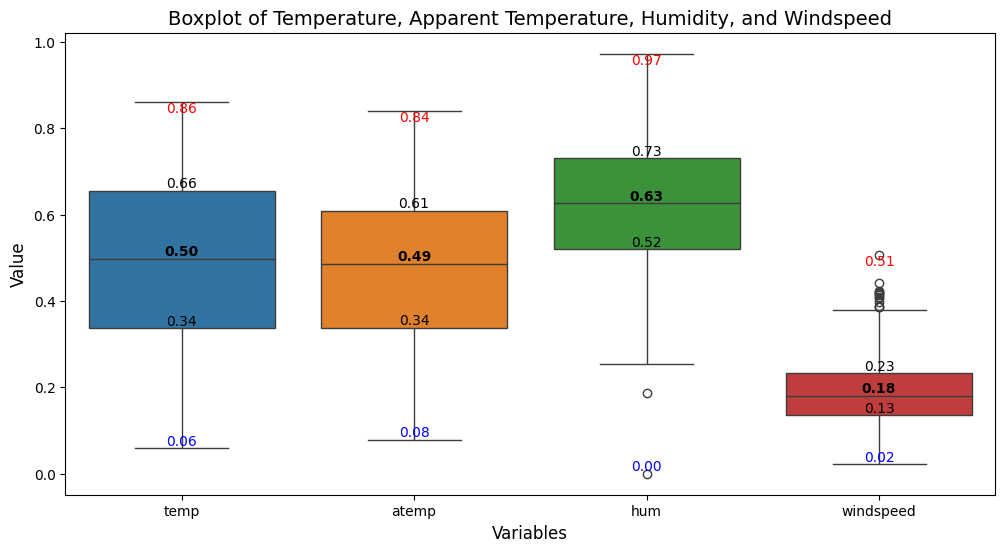

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Menampilkan statistik deskriptif
stats = day_df[['temp', 'atemp', 'hum', 'windspeed']].describe()
print(stats)  # Menampilkan nilai min, Q1, median, Q3, dan max

# Membuat boxplot dengan seaborn
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=day_df[['temp', 'atemp', 'hum', 'windspeed']])

# Menambahkan anotasi untuk nilai statistik
for i, column in enumerate(['temp', 'atemp', 'hum', 'windspeed']):
    min_val = stats.loc['min', column]
    q1_val = stats.loc['25%', column]
    median_val = stats.loc['50%', column]
    q3_val = stats.loc['75%', column]
    max_val = stats.loc['max', column]
    
    # Menambahkan teks pada masing-masing boxplot
    ax.text(i, min_val, f'{min_val:.2f}', ha='center', va='bottom', color='blue')
    ax.text(i, q1_val, f'{q1_val:.2f}', ha='center', va='bottom', color='black')
    ax.text(i, median_val, f'{median_val:.2f}', ha='center', va='bottom', fontweight='bold', color='black')
    ax.text(i, q3_val, f'{q3_val:.2f}', ha='center', va='bottom', color='black')
    ax.text(i, max_val, f'{max_val:.2f}', ha='center', va='top', color='red')

# Menambahkan judul dan label
plt.title('Boxplot of Temperature, Apparent Temperature, Humidity, and Windspeed', fontsize=14)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Value', fontsize=12)

# Menampilkan plot
plt.show()


Insight:
- Terdapat cukup banyak outlier pada windspeed yang menandakan kondisi yang tidak umum terjadi pada beberapa hari tertentu
- Hal ini tentunya berpengaruh pada penggunaan sepeda rental pada saat itu

### Data Cleaning

Insight:
- Oleh karena pertanyaan yang diajukan merupakan time bound sehingga tidak dilakukan drop atau perubahan nilai

## Exploratory Data Analysis (EDA)

### Explore

In [ ]:
# Agregasi data per bulan
monthly_data = day_df.groupby(['yr', 'mnth']).agg({
    'dteday': 'last', 
    'season': 'last',
    'holiday': 'sum',
    'weekday': 'sum',
    'workingday': 'sum',
    'weathersit': 'mean',
    'temp': 'mean',  
    'atemp': 'mean',  
    'hum': 'mean',  
    'windspeed': 'mean',  
    'casual': 'sum',  
    'registered': 'sum',  
    'cnt': 'sum'  
}).reset_index()

# Menampilkan hasil
print(monthly_data)

    yr  mnth      dteday  season  holiday  weekday  workingday  weathersit  \
0    0     1  2011-01-31       1        1       91          20    1.483871   
1    0     2  2011-02-28       1        1       84          19    1.321429   
2    0     3  2011-03-31       2        0       93          23    1.516129   
3    0     4  2011-04-30       2        1       95          20    1.566667   
4    0     5  2011-05-31       2        1       87          21    1.387097   
5    0     6  2011-06-30       3        0       91          22    1.300000   
6    0     7  2011-07-31       3        1       95          20    1.129032   
7    0     8  2011-08-31       3        0       90          23    1.258065   
8    0     9  2011-09-30       4        1       93          21    1.733333   
9    0    10  2011-10-31       4        1       91          20    1.516129   
10   0    11  2011-11-30       4        2       89          20    1.433333   
11   0    12  2011-12-31       1        1       99          21  

Insight:
- Membuat dataset menjadi per bulan untuk menyesuaikan dengan konteks pertanyaan
- Hal itu dilakukan dengan menambahkan jumlah rental sepeda pada kolom 'casual', 'registered', dan 'cnt' per harinya 

In [34]:
# Mengubah nilai 'yr' (0 -> 2011, 1 -> 2012)
monthly_data['yr'] = monthly_data['yr'].replace({0: 2011, 1: 2012})

# Menggabungkan 'yr' dan 'mnth' dalam format 'year-month'
monthly_data['year_month'] = monthly_data['yr'].astype(str) + '-' + monthly_data['mnth'].astype(str)

# Menampilkan hasil
print(monthly_data[['year_month']].head())

  year_month
0     2011-1
1     2011-2
2     2011-3
3     2011-4
4     2011-5


In [37]:
monthly_data.to_csv('monthly.csv', index=False)

In [38]:
month_df = pd.read_csv('D:/DICODING/submission/Bike-sharing-dataset/monthly.csv')
month_df.head()

,yr,mnth,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year_month
0,2011,1,2011-01-31,1,1,91,20,1.483871,0.197707,0.204490,0.584366,0.195419,3073,35116,38189,2011-1
1,2011,2,2011-02-28,1,1,84,19,1.321429,0.282540,0.284412,0.560093,0.228568,6242,41973,48215,2011-2
2,2011,3,2011-03-31,2,0,93,23,1.516129,0.331667,0.325299,0.569414,0.232408,12826,51219,64045,2011-3
3,2011,4,2011-04-30,2,1,95,20,1.566667,0.471188,0.456775,0.668287,0.244216,22346,72524,94870,2011-4
4,2011,5,2011-05-31,2,1,87,21,1.387097,0.577231,0.550814,0.713360,0.181274,31050,104771,135821,2011-5


In [39]:
# Membuat dataframe baru dengan nilai yang sudah dikonversi
monthly_data_converted = month_df.copy()

# Melakukan konversi skala nilai
monthly_data_converted['temp'] = monthly_data_converted['temp'] * 41
monthly_data_converted['atemp'] = monthly_data_converted['atemp'] * 50
monthly_data_converted['hum'] = monthly_data_converted['hum'] * 100
monthly_data_converted['windspeed'] = monthly_data_converted['windspeed'] * 67

# Menampilkan hasil dataframe baru
print(monthly_data_converted.head())

     yr  mnth      dteday  season  holiday  weekday  workingday  weathersit  \
0  2011     1  2011-01-31       1        1       91          20    1.483871   
1  2011     2  2011-02-28       1        1       84          19    1.321429   
2  2011     3  2011-03-31       2        0       93          23    1.516129   
3  2011     4  2011-04-30       2        1       95          20    1.566667   
4  2011     5  2011-05-31       2        1       87          21    1.387097   

        temp      atemp        hum  windspeed  casual  registered     cnt  \
0   8.105974  10.224479  58.436635  13.093060    3073       35116   38189   
1  11.584143  14.220620  56.009311  15.314059    6242       41973   48215   
2  13.598330  16.264958  56.941384  15.571321   12826       51219   64045   
3  19.318726  22.838745  66.828740  16.362499   22346       72524   94870   
4  23.666480  27.540681  71.336019  12.145379   31050      104771  135821   

  year_month  
0     2011-1  
1     2011-2  
2     2011-3  
3 

In [41]:
monthly_data_converted.head(20)

,yr,mnth,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year_month
0,2011,1,2011-01-31,1,1,91,20,1.483871,8.105974,10.224479,58.436635,13.093060,3073,35116,38189,2011-1
1,2011,2,2011-02-28,1,1,84,19,1.321429,11.584143,14.220620,56.009311,15.314059,6242,41973,48215,2011-2
2,2011,3,2011-03-31,2,0,93,23,1.516129,13.598330,16.264958,56.941384,15.571321,12826,51219,64045,2011-3
3,2011,4,2011-04-30,2,1,95,20,1.566667,19.318726,22.838745,66.828740,16.362499,22346,72524,94870,2011-4
4,2011,5,2011-05-31,2,1,87,21,1.387097,23.666480,27.540681,71.336019,12.145379,31050,104771,135821,2011-5
5,2011,6,2011-06-30,3,0,91,22,1.300000,28.416417,32.327972,59.324997,11.939090,30612,112900,143512,2011-6
6,2011,7,2011-07-31,3,1,95,20,1.129032,31.101588,35.533008,58.966397,11.501716,36452,104889,141341,2011-7
7,2011,8,2011-08-31,3,0,90,23,1.258065,28.919847,32.770758,62.683113,12.778276,28842,107849,136691,2011-8
8,2011,9,2011-09-30,4,1,93,21,1.733333,25.128349,28.427252,78.405377,10.250290,26545,100873,127418,2011-9
9,2011,10,2011-10-31,4,1,91,20,1.516129,19.268996,22.938811,70.679468,11.770932,25222,98289,123511,2011-10


## Visualization & Explanatory Analysis

### Pertanyaan 1:

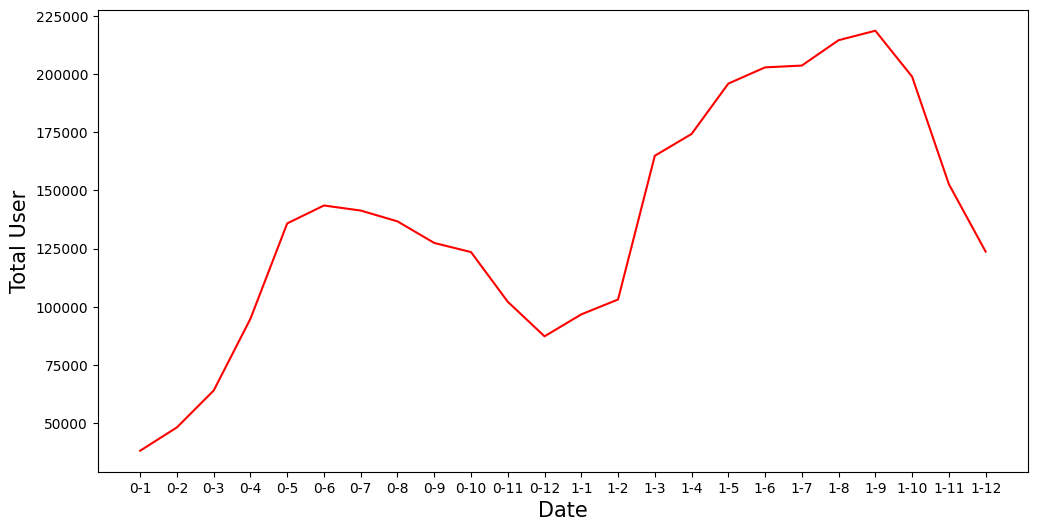

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(month_df['year_month'], month_df['cnt'], color='red')
plt.xlabel('Date',size=15)
plt.ylabel('Total User',size=15)
plt.show()

Insight:
- Penggunaan sepeda rental pada tahun 2011 hingga 2012 mengalami perubahan tiap bulannya, hal ini dipengaruhi oleh berbagai macam hal seperti kondisi cuaca seperti musim, temperatur, dan kecepatan angin
- Oleh karena itu, analisis lebih lanjut diperlukan untuk melihat hubungan tersebut menggunakan dataset ini

In [25]:
month_df.describe()

,yr,mnth,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,0.500000,6.500000,2.50000,0.875000,91.291667,20.833333,1.394882,0.494468,0.473547,0.627456,0.190695,25834.041667,111360.916667,137194.958333
std,0.510754,3.526299,1.14208,0.612372,4.016046,1.203859,0.150626,0.172676,0.151677,0.062624,0.024760,13528.543135,40136.833621,52267.138331
min,0.000000,1.000000,1.00000,0.000000,84.000000,19.000000,1.129032,0.197707,0.204490,0.507839,0.152989,3073.000000,35116.000000,38189.000000
25%,0.000000,3.750000,1.75000,0.750000,88.500000,20.000000,1.266667,0.330045,0.328733,0.581920,0.175446,13140.250000,87474.500000,100811.250000
50%,0.500000,6.500000,2.50000,1.000000,91.000000,20.500000,1.387097,0.470582,0.458082,0.617184,0.184941,27693.500000,106369.000000,136256.000000
75%,1.000000,9.250000,3.25000,1.000000,93.500000,22.000000,1.491935,0.633840,0.600023,0.670043,0.205681,36953.000000,139733.500000,179634.250000
max,1.000000,12.000000,4.00000,2.000000,99.000000,23.000000,1.733333,0.758575,0.710660,0.784054,0.244216,44235.000000,174795.000000,218573.000000


### Pertanyaan 2:

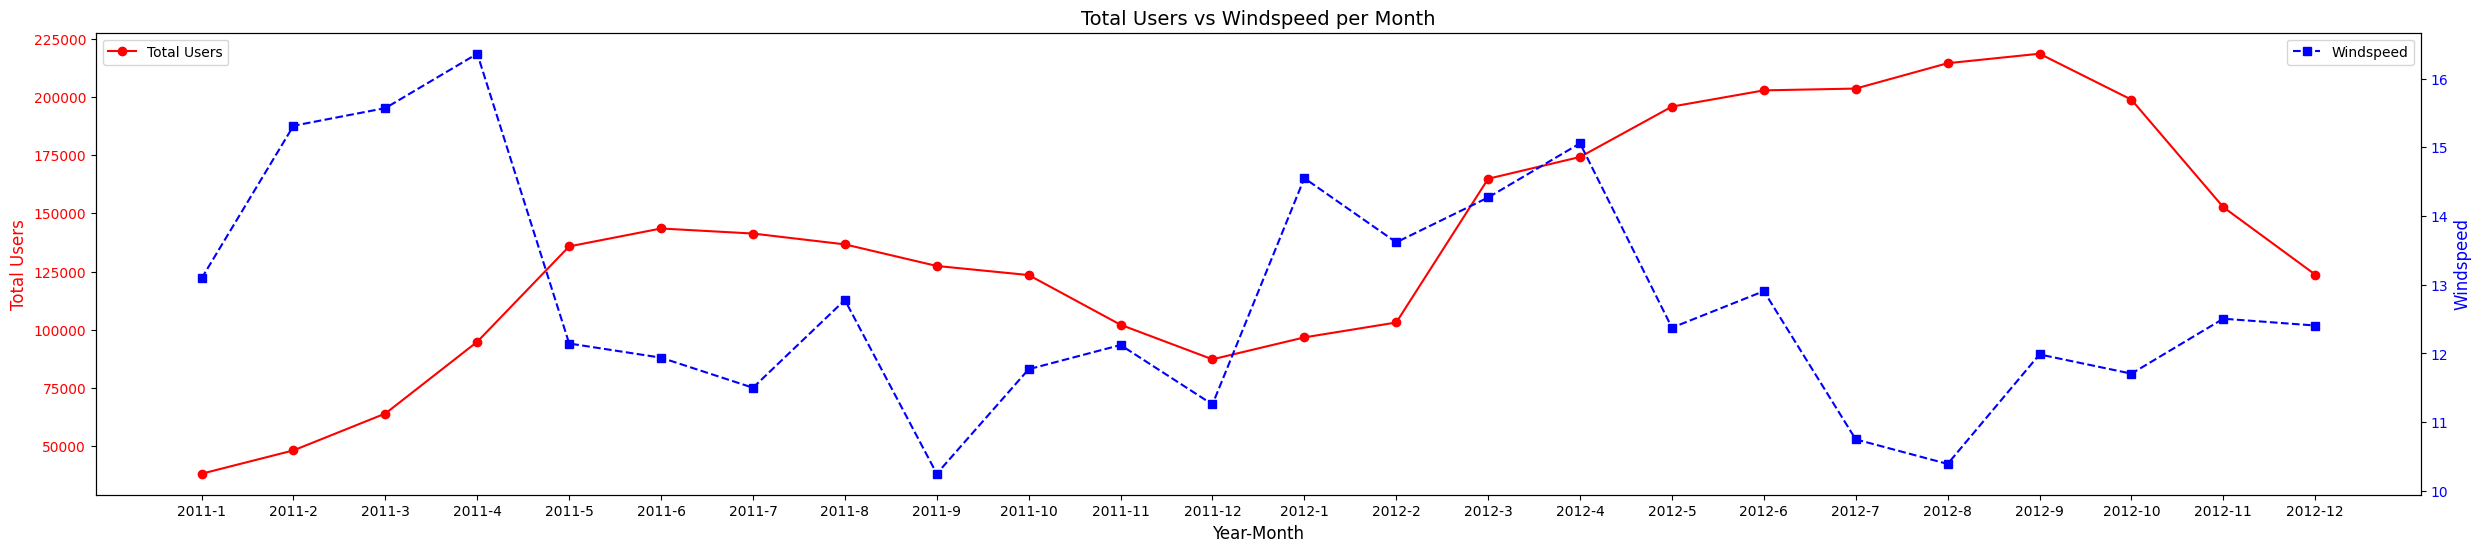

In [44]:
# Menggabungkan kolom 'yr' dan 'mnth' menjadi satu dengan format 'yr-mnth'
monthly_data_converted['year_month'] = monthly_data_converted['yr'].astype(str) + '-' + monthly_data_converted['mnth'].astype(str)

# Urutkan data berdasarkan waktu agar grafik berurutan
monthly_data = monthly_data_converted.sort_values(by=['yr', 'mnth'])

# Buat plot
fig, ax1 = plt.subplots(figsize=(30, 6))

# Plot untuk cnt (sumbu Y pertama)
ax1.plot(monthly_data['year_month'], monthly_data['cnt'], color='red', marker='o', label='Total Users')
ax1.set_xlabel('Year-Month', fontsize=12)
ax1.set_ylabel('Total Users', fontsize=12, color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Sumbu Y kedua untuk windspeed
ax2 = ax1.twinx()
ax2.plot(monthly_data['year_month'], monthly_data['windspeed'], color='blue', marker='s', linestyle='dashed', label='Windspeed')
ax2.set_ylabel('Windspeed', fontsize=12, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Rotasi label X agar lebih terbaca
plt.xticks(rotation=45)

# Tambahkan legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Total Users vs Windspeed per Month', fontsize=14)
plt.show()


Insight:
- Pengaruh kecepatan angin terhadap jumlah penggunaan sepeda rental tiap bulannya merupakan hubungan terbalik, apabila kecepatan angin meningkat maka jumlah penggunaan sepeda renta menurun dan sebaliknya
- Hal ini menunjukan perilaku konsumen dimana konsumen lebih memilih untuk merental sepeda ketika kecepatan angin dirasa cukup rendah untuk berkendara menggunakan sepeda, hal ini dapat dilihat dari kenaikan penggunaan sepeda rental ketika kecepatan angin mengalami penurunan. Meskipun begitu, pengujian kepada konsumen tetap diperlukan untuk memvalidasi informasi ini

### Pertanyaan 3:

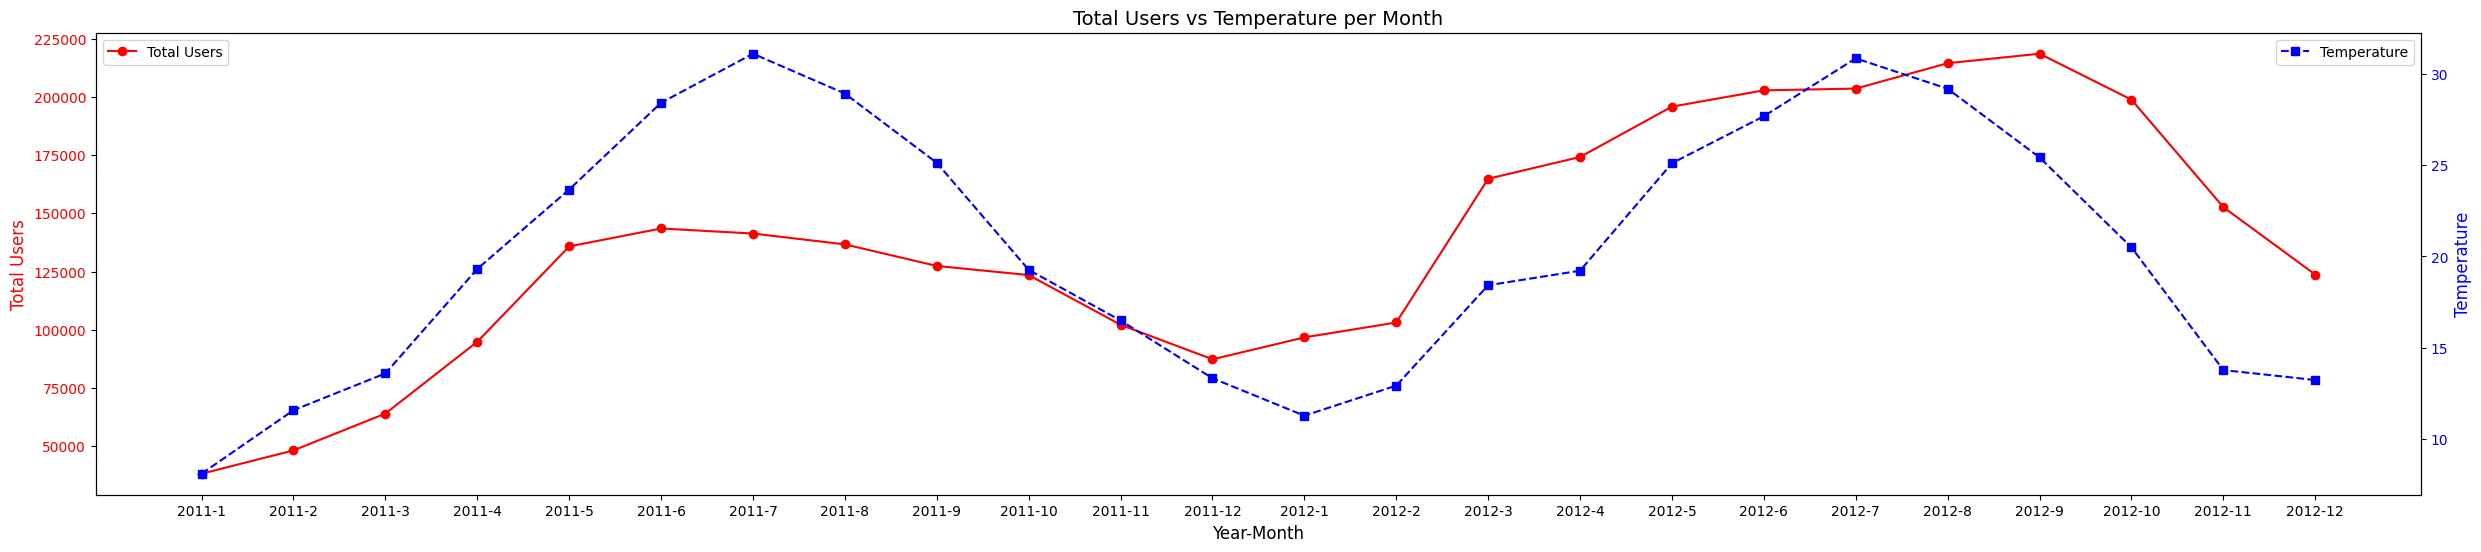

In [46]:
# Buat plot
fig, ax1 = plt.subplots(figsize=(30, 6))

# Plot untuk cnt (sumbu Y pertama)
ax1.plot(monthly_data_converted['year_month'], monthly_data_converted['cnt'], color='red', marker='o', label='Total Users')
ax1.set_xlabel('Year-Month', fontsize=12)
ax1.set_ylabel('Total Users', fontsize=12, color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Sumbu Y kedua untuk windspeed
ax2 = ax1.twinx()
ax2.plot(monthly_data['year_month'], monthly_data_converted['temp'], color='blue', marker='s', linestyle='dashed', label='Temperature')
ax2.set_ylabel('Temperature', fontsize=12, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Rotasi label X agar lebih terbaca
plt.xticks(rotation=45)

# Tambahkan legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Total Users vs Temperature per Month', fontsize=14)
plt.show()


Insight:
- Perubahan rata-rata suhu per bulan yang terdapat pada tempat data diambil berbanding lurus pada perubahan jumlah penggunaan sepeda rental.
- Hal ini menunjukan preferensi pengguna pada suhu lingkungan untuk merental sepeda, diketahui bahwa jumlah penggunaan rental sepeda mengalmai kenaiakan jika suhu mengalami kenaikan pula, meskipun begitu diperlukan pengujian langsung seperti menggunakan kuisoner untuk mengkonfirmasi hal ini.

### Pertanyaan 4

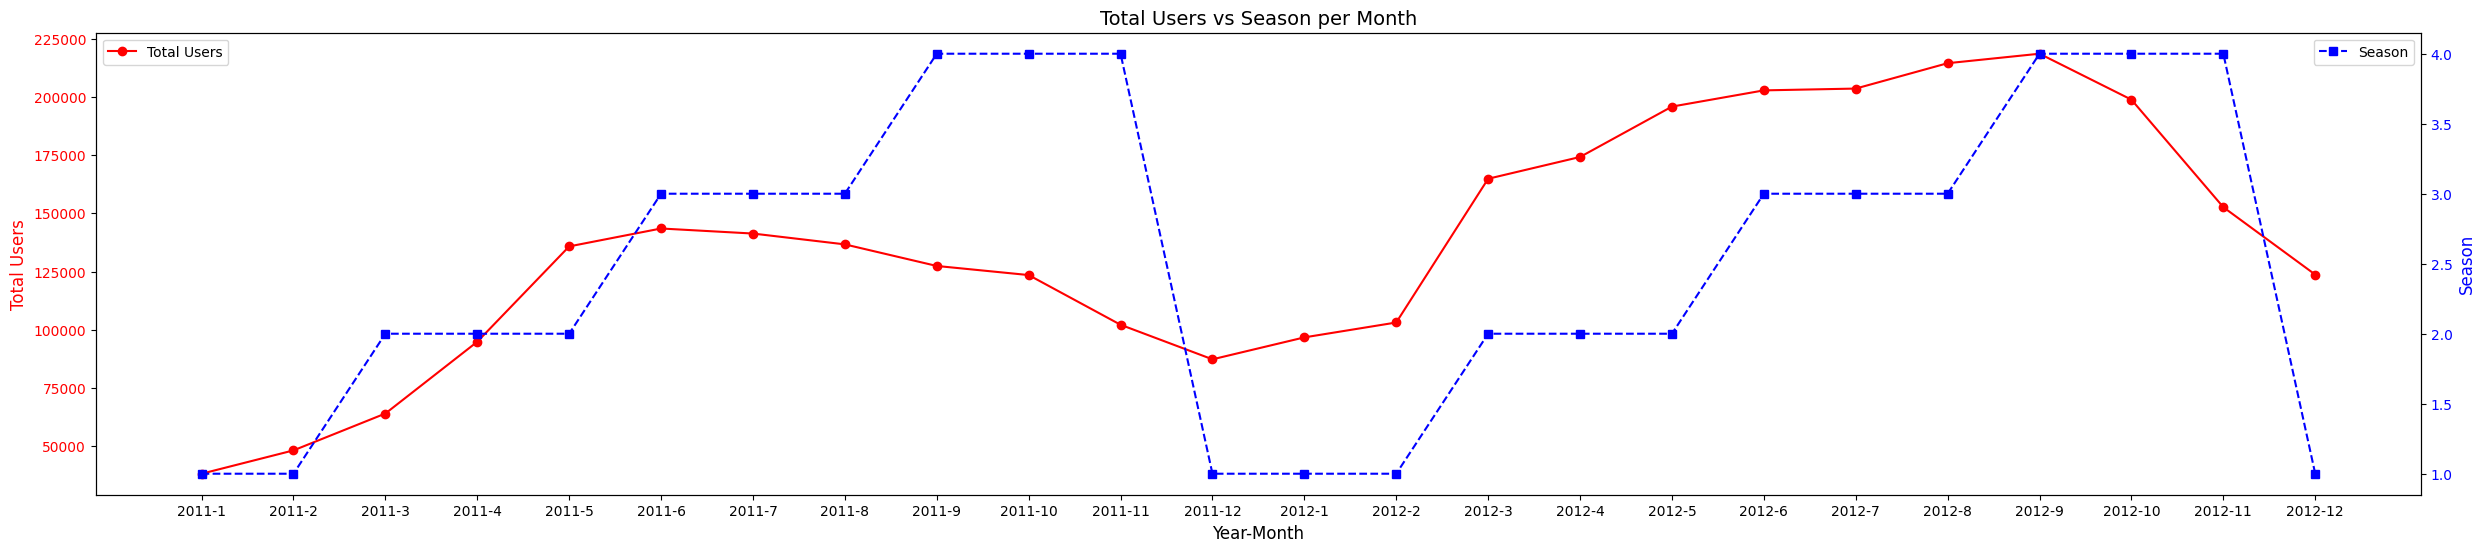

In [47]:
# Buat plot
fig, ax1 = plt.subplots(figsize=(30, 6))

# Plot untuk cnt (sumbu Y pertama)
ax1.plot(monthly_data_converted['year_month'], monthly_data_converted['cnt'], color='red', marker='o', label='Total Users')
ax1.set_xlabel('Year-Month', fontsize=12)
ax1.set_ylabel('Total Users', fontsize=12, color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Sumbu Y kedua untuk holiday
ax2 = ax1.twinx()
ax2.plot(monthly_data_converted['year_month'], monthly_data_converted['season'], color='blue', marker='s', linestyle='dashed', label='Season')
ax2.set_ylabel('Season', fontsize=12, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Rotasi label X agar lebih terbaca
plt.xticks(rotation=45)

# Tambahkan legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Total Users vs Season per Month', fontsize=14)
plt.show()


Insight:
- Perubahan musim juga memiliki pengaruh terhadap perubahan jumlah penggunaan sepeda rental. Hal tersebut dapat dilihat dari musim 1 (Musim Semi), musim 2 (Musim Panas), musim 3 (Musim Gugur) mengalami peningkatan jumlah penggunaan sepeda rental. Sementara itu, dari musim 3 ke musim 4 (Musim Dingin) jumlah penggunaan akan menurun
- Hal ini menunjukan bahwa pengguna lebih menyukai menggunakan sepeda di saat musim yang memiliki suhu yang lebih hangat. Hal ini dikarenakan mungkin tidak memungkinkan untuk bersepeda pada musim dingin karena suhu yang dingin, jalan yang licin, atau jalan yang tertutup salju sehingga menyulitkan untuk bekerndara menggunakan sepeda.